#### Import Important Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
def warn1(*args,**kwargs):
    pass
import warnings
warnings.warn=warn1

In [95]:
tkt1=pd.read_excel('FinSR_Aug2018.xlsx')

In [96]:
tkt1.head(2)

,SR #,Summary,Bugged,Initial Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,Status,Substatus,Last Updated On,Date Opened,Date Closed,Days Open
0,1,Excel Export Issues in R13,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Financial Reporting and Analysis,Prepare Financial Reports,11.13.18.02.0,Open,Review Update,2018-09-04 12:07:08,2018-07-26 22:37:03,NaT,34.7
1,2,AutoMatch doesn't apply cash to trx even with ...,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10418,Oracle Fusion Receivables Cloud Service,Receipts,Receipts,11.13.18.05.0,Open,Review Update,2018-09-04 14:20:08,2018-07-30 18:17:15,NaT,29.6


In [97]:
tkt2=pd.read_excel('SR_Aug2018 _Finance_issues.xlsx')

In [98]:
tkt2.head(2)

,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,SR #,Severity.1,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Open
0,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10418,Oracle Fusion Receivables Cloud Service,Billing - Transactions,UNSPECIFIED,11.12.1.0.0,67.0,2-Significant,Dispute Credit Transaction Creation Process Fa...,Open,Work in Process,2018-09-03 10:41:17,2018-01-05 06:29:02,234,2018-08-27 09:33:33
1,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10416,Oracle Fusion Expenses Cloud Service,Manage Expenses-Approve Expense Report,Approval workflow,11.12.1.0.0,68.0,2-Significant,Employee seeing duplicate Credit Card Expenses...,Open,Work in Process,2018-08-31 20:38:00,2018-01-03 21:05:34,233,2018-08-24 18:15:35


In [99]:
print(len(tkt1.index))
print(len(tkt2.index))

7298
6080


In [107]:
tkt1.columns=tkt1.columns.astype('str')
tkt2.columns=tkt2.columns.astype('str')

In [108]:
list(tkt1.columns)

['SR #',
 'Summary',
 'Bugged',
 'Initial Severity',
 'Product Family',
 'Product Area',
 'Product ID',
 'Product',
 'Component',
 'Sub Component',
 'Product Version',
 'Status',
 'Substatus',
 'Last Updated On',
 'Date Opened',
 'Date Closed',
 'Days Open']

In [109]:
list(tkt2.columns)

['Severity',
 'Product Family',
 'Product Area',
 'Product ID',
 'Product',
 'Component',
 'Sub Component',
 'Product Version',
 'SR #',
 'Severity.1',
 'Summary',
 'Status',
 'Substatus',
 'Last Updated On',
 'Date Opened',
 'Days Open',
 'Date Open']

In [110]:
cols1 = tkt1.columns.tolist()

In [111]:
cols2=tkt2.columns.tolist()

In [117]:
for col in cols1:
    if col in cols2:
        print(col)
    else:
        print(col+' : drop')

SR #
Summary
Bugged : drop
Initial Severity : drop
Product Family
Product Area
Product ID
Product
Component
Sub Component
Product Version
Status
Substatus
Last Updated On
Date Opened
Date Closed : drop
Days Open


In [120]:
ColNames = pd.Index(np.concatenate([tkt2.columns, tkt1.columns])).drop_duplicates()
print(ColNames)

Index(['Severity', 'Product Family', 'Product Area', 'Product ID', 'Product',
       'Component', 'Sub Component', 'Product Version', 'SR #', 'Severity.1',
       'Summary', 'Status', 'Substatus', 'Last Updated On', 'Date Opened',
       'Days Open', 'Date Open', 'Bugged', 'Initial Severity', 'Date Closed'],
      dtype='object')


In [122]:
df = (tkt1.set_index('SR #')
      .combine_first(tkt2.set_index('SR #'))
      .reset_index()
      .reindex(columns=ColNames))

In [123]:
df.shape

(7299, 20)

In [124]:
df=df.drop(['Severity.1'],axis=1)

In [125]:
df=df.drop_duplicates().reset_index(drop=True)

In [126]:
df.head(2)

,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,SR #,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Open,Bugged,Initial Severity,Date Closed
0,NaN,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405.0,Oracle Fusion General Ledger Cloud Service,Financial Reporting and Analysis,Prepare Financial Reports,11.13.18.02.0,1.0,Excel Export Issues in R13,Open,Review Update,2018-09-04 12:07:08,2018-07-26 22:37:03,34.7,NaN,No,2-Significant,NaT
1,NaN,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10418.0,Oracle Fusion Receivables Cloud Service,Receipts,Receipts,11.13.18.05.0,2.0,AutoMatch doesn't apply cash to trx even with ...,Open,Review Update,2018-09-04 14:20:08,2018-07-30 18:17:15,29.6,NaN,No,2-Significant,NaT


In [127]:
print(len(df.index))

7299


In [128]:
df.columns=df.columns.astype(str)

In [129]:
print(sum(df['SR #'].isna()))


1


In [130]:
df=df.loc[df['SR #'].dropna()]

In [131]:
len(df)

7298

In [132]:
print(sum(df['SR #'].isnull()))
df=df.loc[~df['SR #'].isnull()]


1


In [133]:
df['SR #']=df['SR #'].apply(lambda x : int(x))


In [134]:
df.dtypes

Severity                    object
Product Family              object
Product Area                object
Product ID                 float64
Product                     object
Component                   object
Sub Component               object
Product Version             object
SR #                         int64
Summary                     object
Status                      object
Substatus                   object
Last Updated On     datetime64[ns]
Date Opened         datetime64[ns]
Days Open                  float64
Date Open                   object
Bugged                      object
Initial Severity            object
Date Closed         datetime64[ns]
dtype: object

In [135]:
cols_df=list(df.columns)
cols_df

['Severity',
 'Product Family',
 'Product Area',
 'Product ID',
 'Product',
 'Component',
 'Sub Component',
 'Product Version',
 'SR #',
 'Summary',
 'Status',
 'Substatus',
 'Last Updated On',
 'Date Opened',
 'Days Open',
 'Date Open',
 'Bugged',
 'Initial Severity',
 'Date Closed']

In [136]:
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [137]:
df.columns

Index(['Severity', 'Product_Family', 'Product_Area', 'Product_ID', 'Product',
       'Component', 'Sub_Component', 'Product_Version', 'SR_#', 'Summary',
       'Status', 'Substatus', 'Last_Updated_On', 'Date_Opened', 'Days_Open',
       'Date_Open', 'Bugged', 'Initial_Severity', 'Date_Closed'],
      dtype='object')

In [138]:
df=df.rename(columns={'SR_#':'SR'})

In [139]:
df.head(2)

,Severity,Product_Family,Product_Area,Product_ID,Product,Component,Sub_Component,Product_Version,SR,Summary,Status,Substatus,Last_Updated_On,Date_Opened,Days_Open,Date_Open,Bugged,Initial_Severity,Date_Closed
1.0,NaN,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10418.0,Oracle Fusion Receivables Cloud Service,Receipts,Receipts,11.13.18.05.0,2,AutoMatch doesn't apply cash to trx even with ...,Open,Review Update,2018-09-04 14:20:08,2018-07-30 18:17:15,29.6,NaN,No,2-Significant,NaT
2.0,NaN,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10416.0,Oracle Fusion Expenses Cloud Service,Manage Expenses,Enter Expense Report,11.13.18.02.0,3,[IMPL SPT] Cannot create expense rpt with non ...,Open,Close Requested,2018-09-05 01:11:00,2018-08-01 01:10:42,35.2,NaN,No,2-Significant,NaT


In [140]:
df.Product_ID=df.Product_ID.apply(lambda x : str(x))
df.SR=df.SR.apply(lambda x : str(x))

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7297 entries, 1.0 to 7297.0
Data columns (total 19 columns):
Severity            6079 non-null object
Product_Family      7297 non-null object
Product_Area        7297 non-null object
Product_ID          7297 non-null object
Product             7297 non-null object
Component           7297 non-null object
Sub_Component       7297 non-null object
Product_Version     7212 non-null object
SR                  7297 non-null object
Summary             7297 non-null object
Status              7297 non-null object
Substatus           7297 non-null object
Last_Updated_On     7297 non-null datetime64[ns]
Date_Opened         7297 non-null datetime64[ns]
Days_Open           7297 non-null float64
Date_Open           6079 non-null object
Bugged              7297 non-null object
Initial_Severity    7297 non-null object
Date_Closed         3074 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(15)
memory usage: 1.1+ MB


In [142]:
def uniq(x):
    print(len(x.unique()))

In [143]:
df.Bugged.unique()

array(['No', 'Yes'], dtype=object)

In [144]:
uniq(df.Product)
uniq(df.Product_Area)
uniq(df.Product_Family)
uniq(df.Product_ID)
uniq(df.Product_Version)
uniq(df.Component)
uniq(df.Sub_Component)
uniq(df.Initial_Severity)
uniq(df.Severity)

41
10
5
41
22
158
334
4
7


#### Product_ID and Product are interrelated, hence we can drop off Product_ID
#### Every Product belongs to a Product_Family
#### Product_Version seems less important as it has no use in analysis

In [145]:
df.Bugged=df.Bugged.astype('category')

In [146]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [147]:
le=LabelEncoder()
ose=OneHotEncoder()

In [148]:
df.iloc[: , 16]=le.fit_transform(df.iloc[: , 16])

In [149]:
df=df.drop(['Severity','Date_Open','Date_Closed','Product_ID'],axis=1).reset_index(drop=True)

In [150]:
df.iloc[: , 8]=le.fit_transform(df.iloc[: , 8])

In [151]:
df.head(2)

,Product_Family,Product_Area,Product,Component,Sub_Component,Product_Version,SR,Summary,Status,Substatus,Last_Updated_On,Date_Opened,Days_Open,Bugged,Initial_Severity
0,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Receivables Cloud Service,Receipts,Receipts,11.13.18.05.0,2,AutoMatch doesn't apply cash to trx even with ...,1,Review Update,2018-09-04 14:20:08,2018-07-30 18:17:15,29.6,0,2-Significant
1,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Expenses Cloud Service,Manage Expenses,Enter Expense Report,11.13.18.02.0,3,[IMPL SPT] Cannot create expense rpt with non ...,1,Close Requested,2018-09-05 01:11:00,2018-08-01 01:10:42,35.2,0,2-Significant


In [152]:
df.Initial_Severity=df.Initial_Severity.apply(lambda x : int(x[:1]))

In [153]:
df=df.drop_duplicates()

In [154]:
df=df.drop(columns=['Product_Version','SR','Last_Updated_On','Summary'],axis=1)

In [155]:
df.head(2)

,Product_Family,Product_Area,Product,Component,Sub_Component,Status,Substatus,Date_Opened,Days_Open,Bugged,Initial_Severity
0,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Receivables Cloud Service,Receipts,Receipts,1,Review Update,2018-07-30 18:17:15,29.6,0,2
1,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Expenses Cloud Service,Manage Expenses,Enter Expense Report,1,Close Requested,2018-08-01 01:10:42,35.2,0,2


In [156]:
list(df.Product_Family.unique())

['Oracle Software Cloud',
 'Financials Management',
 'Oracle Platform Cloud',
 'Supply Chain Management',
 'Procurement']

#### Ploting the Bar Plot

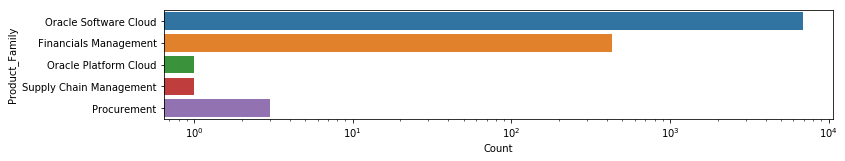

In [182]:
plt.figure(figsize=(12,2))
sns.barplot(x=df.Product_Family.index,y=df.Product_Family,estimator=np.count_nonzero)
plt.xlabel('Count')
plt.xscale('log')

In [162]:
prod_osc=df.loc[df.Product_Family.isin(['Oracle Software Cloud'])].reset_index(drop=True)
prod_fm=df.loc[df.Product_Family.isin(['Financials Management'])].reset_index(drop=True)
prod_opc=df.loc[df.Product_Family.isin(['Oracle Platform Cloud'])].reset_index(drop=True)
prod_scm=df.loc[df.Product_Family.isin(['Supply Chain Management'])].reset_index(drop=True)
prod_pcr=df.loc[df.Product_Family.isin(['Procurement'])].reset_index(drop=True)
prod_pcr=df.loc[df.Product_Family.isin(['Procurement'])].reset_index(drop =True)

In [163]:
print(prod_osc.Product_Area.unique())
print('\n')
print(prod_fm.Product_Area.unique())
print('\n')
print(prod_opc.Product_Area.unique())
print('\n')
print(prod_scm.Product_Area.unique())
print('\n')
print(prod_pcr.Product_Area.unique())

['Oracle Enterprise Resource Planning Cloud'
 'Oracle Customer Relationship Management Cloud'
 'Oracle Human Capital Management Cloud']


['Ledger' 'Receivables' 'Payables' 'Financials Common']


['Oracle Integration Cloud Service']


['Globalization']


['Procurement']


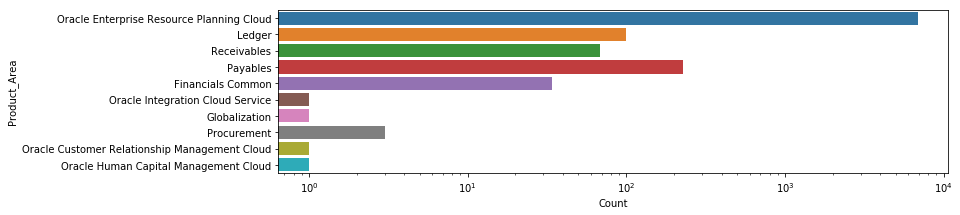

In [164]:
plt.figure(figsize=(12,3))
sns.barplot(x=df.Product_Area.index,y=df.Product_Area,estimator=np.count_nonzero)
plt.xlabel('Count')
plt.xscale('log')

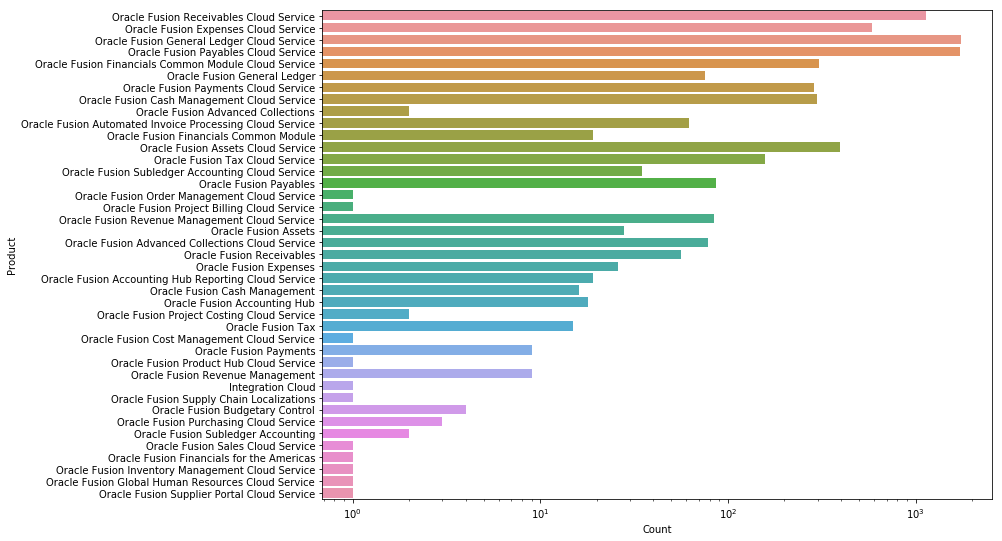

In [165]:
plt.figure(figsize=(12,9))
sns.barplot(x=df.Product.index,y=df.Product,estimator=np.count_nonzero)
plt.xlabel('Count')
plt.xscale('log')

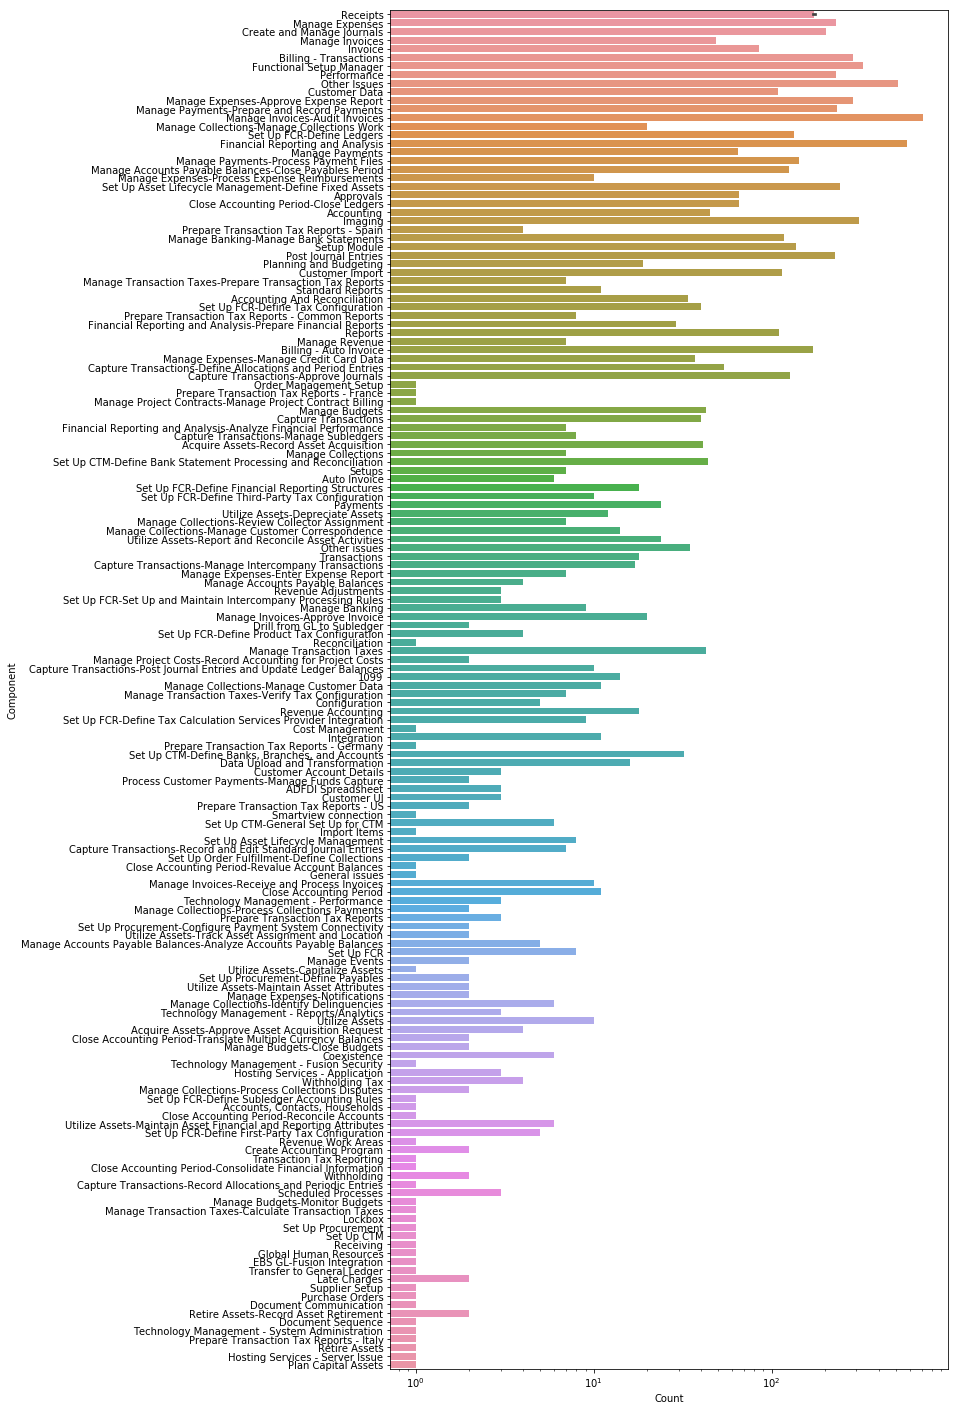

In [166]:
plt.figure(figsize=(10,25))
sns.barplot(x=df.Component.index,y=df.Component,estimator=np.count_nonzero)
plt.xlabel('Count')
plt.xscale('log')


In [167]:
list(df.columns)

['Product_Family',
 'Product_Area',
 'Product',
 'Component',
 'Sub_Component',
 'Status',
 'Substatus',
 'Date_Opened',
 'Days_Open',
 'Bugged',
 'Initial_Severity']

In [168]:
df_prod_group=df[['Product_Family','Product_Area','Product']].groupby(['Product_Family','Product_Area'],as_index=False).count().sort_values('Product',ascending=False).reset_index(drop=True)

In [169]:
df_prod_group

,Product_Family,Product_Area,Product
0,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,6862
1,Financials Management,Payables,227
2,Financials Management,Ledger,99
3,Financials Management,Receivables,68
4,Financials Management,Financials Common,34
5,Procurement,Procurement,3
6,Oracle Platform Cloud,Oracle Integration Cloud Service,1
7,Oracle Software Cloud,Oracle Customer Relationship Management Cloud,1
8,Oracle Software Cloud,Oracle Human Capital Management Cloud,1
9,Supply Chain Management,Globalization,1


#### Products are specific to each Product Area/Family

In [170]:
df_component_group=df[['Component','Sub_Component']].groupby(['Component'],as_index=False).count().sort_values('Sub_Component',ascending=False).reset_index(drop=True)

In [171]:
df_component_group.head(50)

,Component,Sub_Component
0,Manage Invoices-Audit Invoices,711
1,Financial Reporting and Analysis,578
2,Other Issues,511
3,Functional Setup Manager,327
4,Imaging,310
5,Billing - Transactions,288
6,Manage Expenses-Approve Expense Report,287
7,Set Up Asset Lifecycle Management-Define Fixed...,244
8,Manage Payments-Prepare and Record Payments,234
9,Manage Expenses,229


In [172]:
sum(df_component_group.Sub_Component[:10])

3719

#### Sub-components are not specific to any component

In [173]:
df.head()

,Product_Family,Product_Area,Product,Component,Sub_Component,Status,Substatus,Date_Opened,Days_Open,Bugged,Initial_Severity
0,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Receivables Cloud Service,Receipts,Receipts,1,Review Update,2018-07-30 18:17:15,29.6,0,2
1,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Expenses Cloud Service,Manage Expenses,Enter Expense Report,1,Close Requested,2018-08-01 01:10:42,35.2,0,2
2,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion General Ledger Cloud Service,Create and Manage Journals,Journal Import,0,Not Entitled,2018-08-01 01:26:35,0.3,0,2
3,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Payables Cloud Service,Manage Invoices,Approve Invoice,0,No fault found,2018-08-01 00:10:50,19.7,0,2
4,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Payables Cloud Service,Invoice,Invoice - Payment Request,0,Customer Abandoned,2018-08-01 00:31:15,13.9,0,2


In [174]:
df.Date_Opened.dtype

dtype('<M8[ns]')

In [175]:
import time
from time import mktime
from datetime import datetime

In [176]:
df['Time']=df.Date_Opened.dt.time

In [178]:
len(df.index)

7297

In [179]:
print('Severity - 1 : ', sum(df.Initial_Severity==1))
print('Severity - 2 : ', sum(df.Initial_Severity==2))
print('Severity - 3 : ', sum(df.Initial_Severity==3))
print('Severity - 4 : ', sum(df.Initial_Severity==4))

Severity - 1 :  2570
Severity - 2 :  3898
Severity - 3 :  720
Severity - 4 :  109


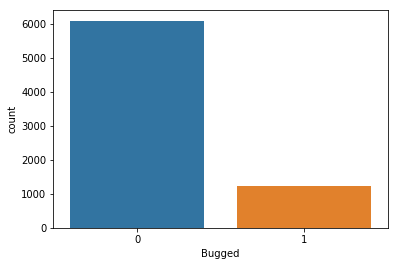

In [180]:
sns.countplot(df.Bugged)

In [181]:
print('Bugged issues : ',sum(df.Bugged==1))
print('Not-Bugged issues : ',sum(df.Bugged==0))

Bugged issues :  1214
Not-Bugged issues :  6083
